# Import Required Libraries
Import the necessary libraries, including NumPy, Matplotlib, and scikit-learn.

In [2]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
Load the non-overlapping dataset into the notebook.

The make_classification function from scikit-learn is used to generate a synthetic classification dataset.

* n_samples=190: The dataset will contain 190 samples.
* n_features=2: Each sample will have 2 features.
* n_informative=2: Both features will be informative, meaning they will be useful for distinguishing between the classes.
* n_redundant=0: There will be no redundant features.
* n_clusters_per_class=1: Each class will form a single cluster in the feature space.
* class_sep=2.0: The classes will be well-separated, making the classification task easier.
* random_state=42: The dataset generation will be reproducible with the same random state.

Example 1:Imagine a medical study aiming to distinguish between two types of patients based on two key biomarkers.

example 2: Consider a manufacturing process where you need to classify products as either "defective" or "non-defective" based on two key measurements.

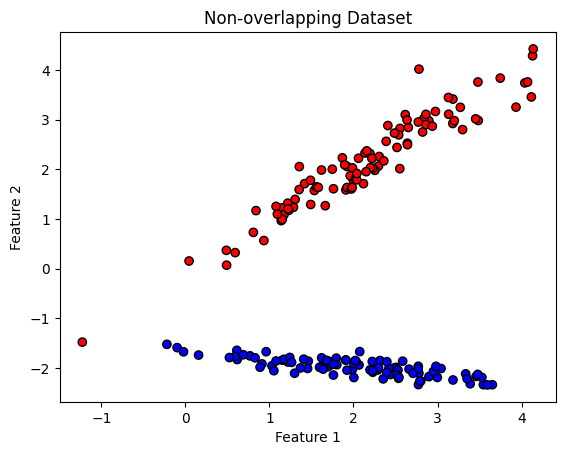

In [3]:
# Load a non-overlapping dataset using sklearn's make_classification function
from sklearn.datasets import make_classification

# Create a non-overlapping dataset

X, y = make_classification(n_samples=190, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot the dataset to visualize the non-overlapping classes
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title('Non-overlapping Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Visualize Dataset
Use Matplotlib to visualize the dataset and ensure it is non-overlapping.

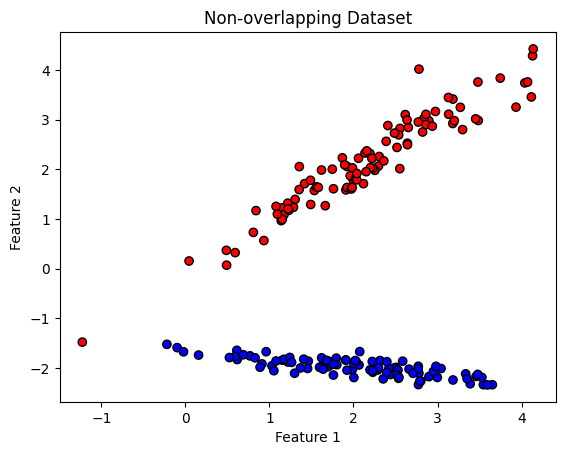

In [4]:
# Visualize Dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title('Non-overlapping Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Split Dataset into Training and Testing Sets
Use scikit-learn's train_test_split to split the dataset into training and testing sets.

In [5]:
# Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM Model with Linear Kernel
Use scikit-learn's SVM module to train a model with a linear kernel on the training set.

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, ke

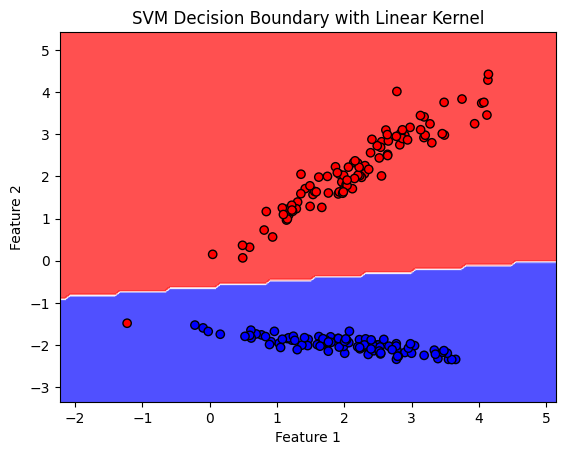

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a non-overlapping dataset
X, y = make_classification(n_samples=190, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for 'C'
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear']
}

# Initialize the GridSearchCV with SVM and parameter grid
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-validation Score: {grid.best_score_}")

# Test the best model on the test set
y_pred = grid.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Create a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Predict the function value for the whole grid
Z = grid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training points
plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        28

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

Confusion Matrix:
[[29  0]
 [ 0 28]]


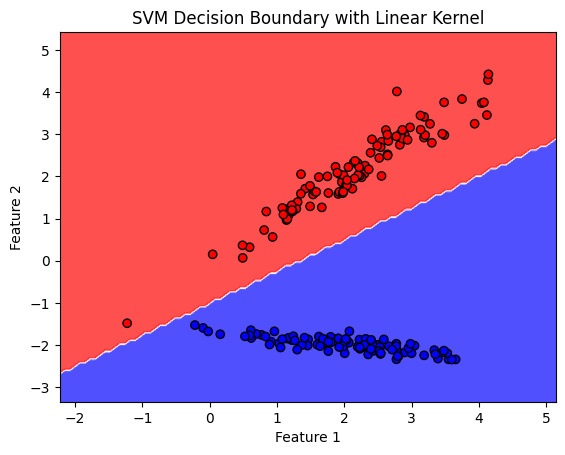

In [6]:
svm_linear = SVC(kernel='linear', C=1)

svm_linear.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_linear.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Create a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Predict the function value for the whole grid
Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training points
plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluate Model Performance
Evaluate the performance of the trained SVM model using metrics such as accuracy, precision, and recall.

In [7]:
# Evaluate Model Performance

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        28

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

Confusion Matrix:
[[29  0]
 [ 0 28]]


# Visualize Decision Boundary
Visualize the decision boundary of the trained SVM model using Matplotlib.

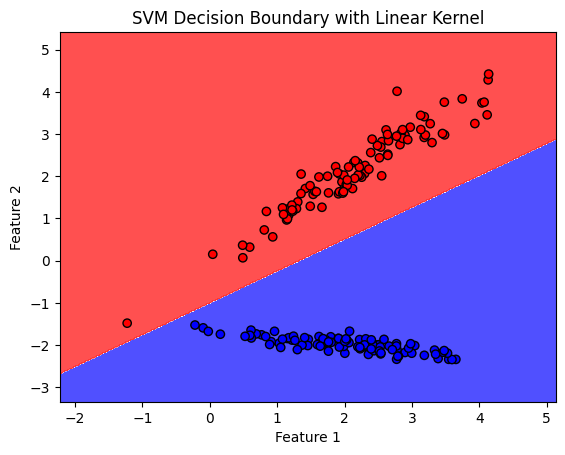

In [8]:
# Visualize Decision Boundary
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training points
plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

--- 

Grid search is a hyperparameter optimization technique used to find the best combination of hyperparameters for a machine learning model. It involves systematically searching through a specified subset of the hyperparameter space, evaluating the model's performance for each combination, and selecting the combination that yields the best performance.



---

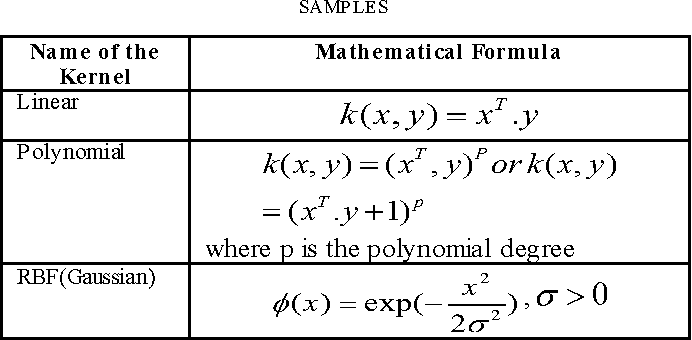

\begin{align*}
K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j
\end{align*}

Where:

\begin{align*}
( K(\mathbf{x}_i, \mathbf{x}_j) \) is the kernel function. \\
\( \mathbf{x}_i \) and \( \mathbf{x}_j \) are the feature vectors of the data points. \\
\( \cdot \) denotes the dot product.

\end{align*}

## Linear SVM Kernel

A Linear Support Vector Machine (SVM) finds the hyperplane that maximizes the margin between the two classes. In the linear case, the decision boundary is a straight line (or a hyperplane in higher dimensions). The optimization problem for the linear SVM can be formulated as follows:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
$$

subject to the constraint that:

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \quad \forall i = 1, 2, \dots, N
$$

Where:
- $\mathbf{w}$ is the weight vector,
- $b$ is the bias term,
- $\mathbf{x}_i$ is the feature vector of the $i$-th training sample,
- $y_i$ is the label of the $i$-th training sample, and
- $N$ is the total number of samples.

In this case, the kernel function is the linear kernel:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j
$$

The decision function of the SVM in the testing phase is given by:

$$
f(\mathbf{x}) = \text{sign}(\mathbf{w}^T \mathbf{x} + b)
$$

where $\text{sign}$ is the sign function.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, ke

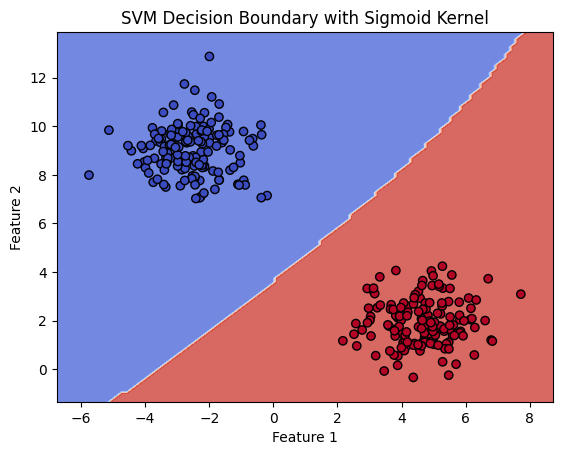

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a non-overlapping dataset
X, y = datasets.make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for 'C' and 'gamma'
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['sigmoid']
}

# Initialize the GridSearchCV with SVM and parameter grid
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-validation Score: {grid.best_score_}")

# Test the best model on the test set
y_pred = grid.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Create a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Predict the function value for the whole grid
Z = grid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary with Sigmoid Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a non-overlapping dataset
X, y = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for 'C' and 'gamma'
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf']
}

# Initialize the GridSearchCV with SVM and parameter grid
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-validation Score: {grid.best_score_}")

# Test the best model on the test set
y_pred = grid.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Create a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Predict the function value for the whole grid
Z = grid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10,

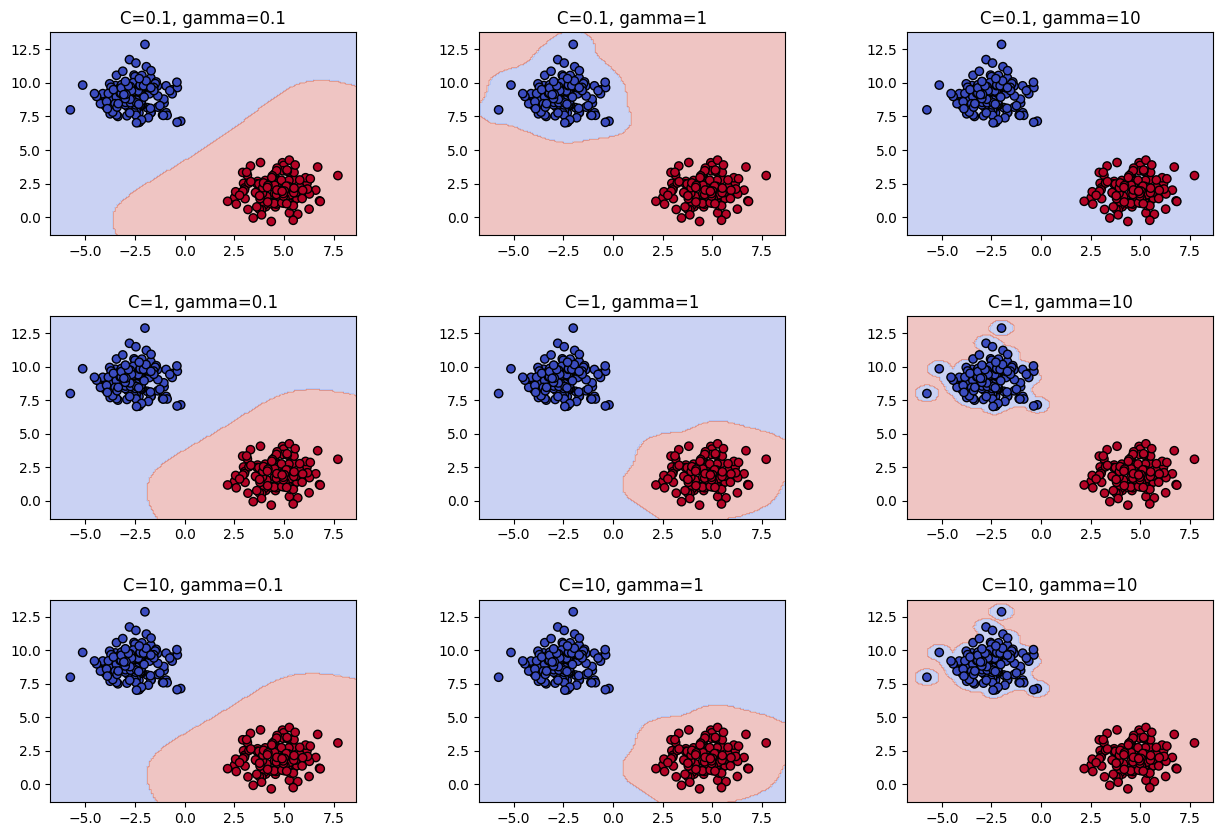

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate a non-overlapping dataset
X, y = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.0)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different combinations of C and gamma
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        plot_decision_boundaries(X, y, model, axes[i, j])
        axes[i, j].set_title(f"C={C}, gamma={gamma}")

plt.show()

Low C and Low gamma:
* The decision boundary is simple and smooth.
*The model likely underfits the data.

Low C and High gamma:
* The decision boundary starts to overfit by focusing on more intricate patterns.

High C and Low gamma:
* The decision boundary attempts to classify all points correctly, leading to a more complex boundary but still with some generalization.

High C and High gamma:
* The decision boundary is highly complex and adapts to the noise in the dataset.
* This configuration is prone to overfitting.

C = 0.1, gamma = 0.1:

* Low C and low gamma: Decision boundary is relatively simple and smooth. The SVM allows for some misclassifications to prioritize a wider margin.

C = 0.1, gamma = 1:

* Low C, high gamma: Decision boundary is more complex, but still relatively smooth. The SVM allows for some misclassifications but is more sensitive to nearby training examples.

C = 0.1, gamma = 10:

* Low C, very high gamma: Decision boundary is highly complex and potentially overfitting. The SVM is very sensitive to nearby training examples, leading to intricate decision regions.

C = 1, gamma = 0.1:

* Medium C, low gamma: Decision boundary is more complex than in the first case due to the higher C value. The SVM tries to minimize misclassifications while maintaining a relatively smooth boundary.

C = 1, gamma = 1:

* Medium C, medium gamma: Decision boundary is more complex than in the previous cases. The SVM balances the margin and misclassification penalty with moderate sensitivity to nearby training examples.

C = 1, gamma = 10:

* Medium C, very high gamma: Decision boundary is highly complex and potentially overfitting. The SVM is more sensitive to nearby training examples than in the previous cases.

C = 10, gamma = 0.1:

* High C, low gamma: Decision boundary is complex and potentially overfitting. The SVM prioritizes minimizing misclassifications, leading to a less smooth boundary.

C = 10, gamma = 1:

* High C, medium gamma: Decision boundary is highly complex and likely overfitting. The SVM strongly penalizes misclassifications and is moderately sensitive to nearby training examples.

C = 10, gamma = 10:

* High C, very high gamma: Decision boundary is extremely complex and highly overfitting. The SVM strongly penalizes misclassifications and is very sensitive to nearby training examples, leading to a highly intricate and potentially non-generalizable decision boundary.

---

SVM Polynomial

---


## Polynomial SVM Kernel

A Polynomial Support Vector Machine (SVM) uses a polynomial kernel to map input data into a higher-dimensional feature space. The kernel function in this case is given by:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i^T \mathbf{x}_j + c)^d
$$

Where:
- \( \mathbf{x}_i \) and \( \mathbf{x}_j \) are input feature vectors,
- \( c \) is a constant (a free parameter, usually set to 0 or 1),
- \( d \) is the degree of the polynomial kernel.

### The optimization problem for the polynomial kernel-based SVM is the same as for the linear SVM:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
$$

subject to the constraint that:

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \quad \forall i = 1, 2, \dots, N
$$

Where:
- \( \mathbf{w} \) is the weight vector,
- \( b \) is the bias term,
- \( \mathbf{x}_i \) is the feature vector of the \( i \)-th training sample,
- \( y_i \) is the label of the \( i \)-th training sample, and
- \( N \) is the total number of samples.

The decision function of the SVM in the testing phase is:

$$
f(\mathbf{x}) = \text{sign} \left( \sum_{i=1}^{N} \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b \right)
$$

where:
- \( \alpha_i \) are the Lagrange multipliers from the optimization problem,
- \( K(\mathbf{x}_i, \mathbf{x}) \) is the kernel function (polynomial kernel in this case),
- \( b \) is the bias term,
- \( \text{sign} \) is the sign function.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a non-overlapping dataset
X, y = datasets.make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for 'C' and 'degree'
param_grid = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'kernel': ['poly']
}

# Initialize the GridSearchCV with SVM and parameter grid
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-validation Score: {grid.best_score_}")

# Test the best model on the test set
y_pred = grid.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Create a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Predict the function value for the whole grid
Z = grid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................C=0.1, degree=2, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=2, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=2, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=2, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=2, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=4, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=4, 

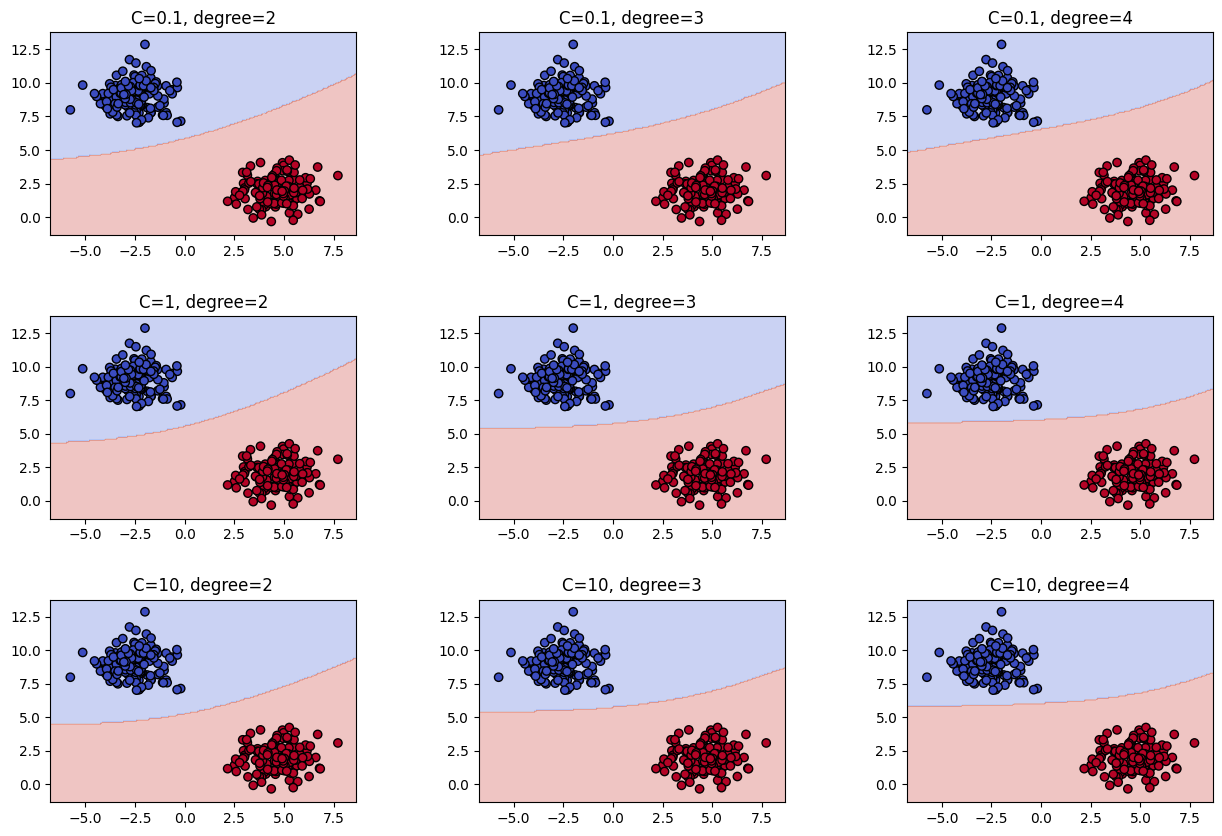

In [2]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a non-overlapping dataset
X, y = datasets.make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.0)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different combinations of C and degree
C_values = [0.1, 1, 10]
degree_values = [2, 3, 4]

fig, axes = plt.subplots(len(C_values), len(degree_values), figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, C in enumerate(C_values):
    for j, degree in enumerate(degree_values):
        model = SVC(kernel='poly', C=C, degree=degree)
        model.fit(X_train, y_train)
        plot_decision_boundaries(X, y, model, axes[i, j])
        axes[i, j].set_title(f"C={C}, degree={degree}")

plt.show()

Low C and Low degree:
* The decision boundary is simple and smooth.
* The model likely underfits the data.

Low C and High degree:
* The decision boundary starts to overfit by focusing on more intricate patterns.

High C and Low degree:
* The decision boundary attempts to classify all points correctly, leading to a more complex boundary but still with some generalization.

High C and High degree:
* The decision boundary is highly complex and adapts to the noise in the dataset.
* This configuration is prone to overfitting.

C = 0.1, degree = 2:
* Low C and low degree: The decision boundary is relatively simple and smooth. The SVM allows for some misclassifications to prioritize a wider margin, and the polynomial kernel of degree 2 captures basic quadratic relationships.

C = 0.1, degree = 3:
* Low C and medium degree: The decision boundary is more complex than in the first case due to the higher degree. The SVM allows for some misclassifications but can capture cubic relationships, leading to a more flexible boundary.

C = 0.1, degree = 4:
* Low C and high degree: The decision boundary is more complex and potentially overfitting. The SVM allows for some misclassifications but can capture quartic relationships, leading to intricate decision regions.

C = 1, degree = 2:
* Medium C and low degree: The decision boundary is more complex than in the first case due to the higher C value. The SVM tries to minimize misclassifications while maintaining a relatively smooth boundary, capturing basic quadratic relationships.

C = 1, degree = 3:
* Medium C and medium degree: The decision boundary is more complex than in the previous cases. The SVM balances the margin and misclassification penalty with the ability to capture cubic relationships, leading to a more flexible boundary.

C = 1, degree = 4:
* Medium C and high degree: The decision boundary is highly complex and potentially overfitting. The SVM tries to minimize misclassifications while capturing quartic relationships, leading to intricate decision regions.

C = 10, degree = 2:
* High C and low degree: The decision boundary is complex and potentially overfitting. The SVM prioritizes minimizing misclassifications, leading to a less smooth boundary while capturing basic quadratic relationships.

C = 10, degree = 3:
* High C and medium degree: The decision boundary is highly complex and likely overfitting. The SVM strongly penalizes misclassifications and captures cubic relationships, leading to a more flexible but potentially overfitting boundary.

C = 10, degree = 4:
* High C and high degree: The decision boundary is extremely complex and highly overfitting. The SVM strongly penalizes misclassifications and captures quartic relationships, leading to a highly intricate and potentially non-generalizable decision boundary.




---

Sigmoid kernel

---

## Sigmoid SVM Kernel

A Sigmoid Support Vector Machine (SVM) uses the sigmoid kernel to map input data into a higher-dimensional feature space. The kernel function is defined as:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\alpha \mathbf{x}_i^T \mathbf{x}_j + c)
$$

Where:
- \( \mathbf{x}_i \) and \( \mathbf{x}_j \) are input feature vectors,
- \( \alpha \) is a scaling factor (a free parameter, usually positive),
- \( c \) is a constant (often set to 0 or 1),
- \( \tanh \) is the hyperbolic tangent function.

### The optimization problem for the sigmoid kernel-based SVM is the same as for the linear or polynomial SVMs:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
$$

subject to the constraint that:

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \quad \forall i = 1, 2, \dots, N
$$

Where:
- \( \mathbf{w} \) is the weight vector,
- \( b \) is the bias term,
- \( \mathbf{x}_i \) is the feature vector of the \( i \)-th training sample,
- \( y_i \) is the label of the \( i \)-th training sample, and
- \( N \) is the total number of samples.

The decision function of the SVM in the testing phase is:

$$
f(\mathbf{x}) = \text{sign} \left( \sum_{i=1}^{N} \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b \right)
$$

where:
- \( \alpha_i \) are the Lagrange multipliers from the optimization problem,
- \( K(\mathbf{x}_i, \mathbf{x}) \) is the kernel function (sigmoid kernel in this case),
- \( b \) is the bias term,
- \( \text{sign} \) is the sign function.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a non-overlapping dataset
X, y = datasets.make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for 'C' and 'gamma'
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['sigmoid']
}

# Initialize the GridSearchCV with SVM and parameter grid
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-validation Score: {grid.best_score_}")

# Test the best model on the test set
y_pred = grid.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Create a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Predict the function value for the whole grid
Z = grid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, ke

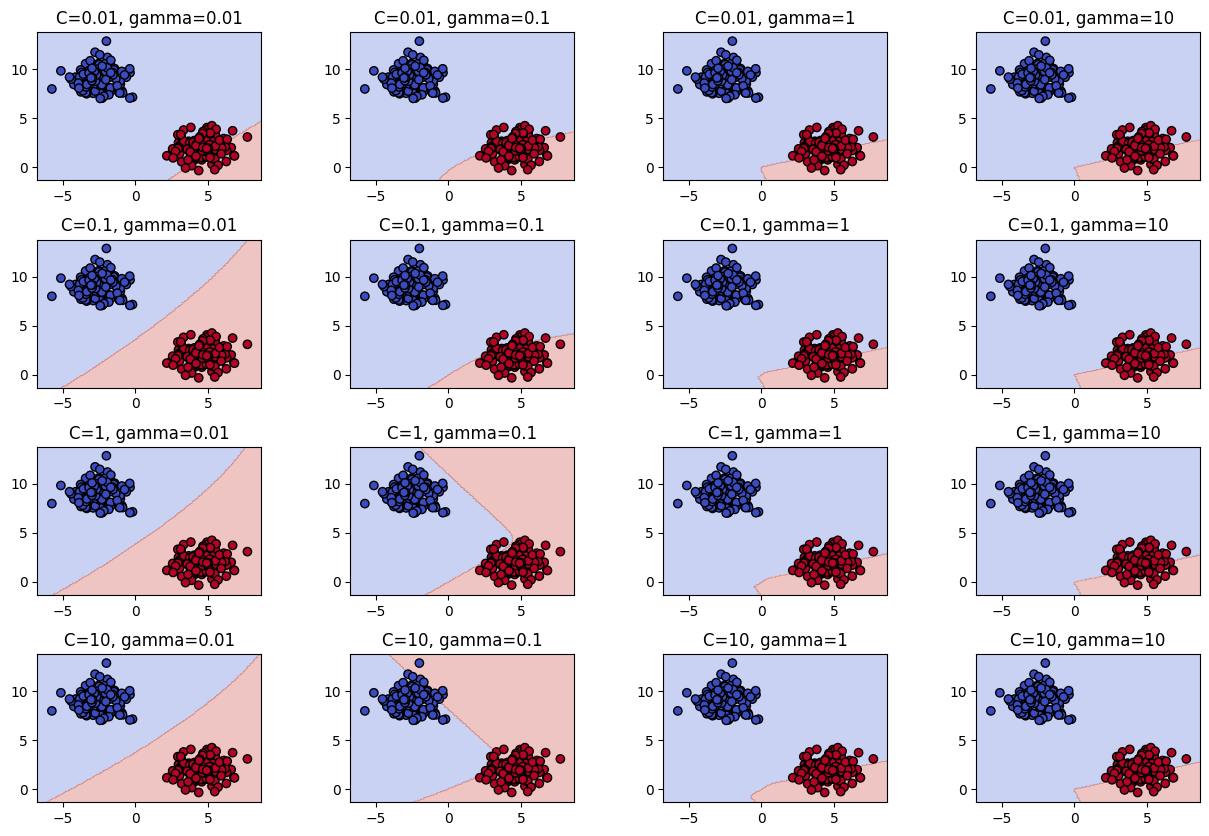

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a non-overlapping dataset
X, y = datasets.make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.0)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different combinations of C and gamma
C_values = [0.01,0.1, 1, 10]
gamma_values = [0.01,0.1, 1, 10]

fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='sigmoid', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        plot_decision_boundaries(X, y, model, axes[i, j])
        axes[i, j].set_title(f"C={C}, gamma={gamma}")

plt.show()

C = 0.01, gamma = 0.01:
* Very Low C and Very Low gamma: The decision boundary is very simple and smooth. The SVM allows for many misclassifications to prioritize a very wide margin, and the sigmoid kernel captures very basic relationships.

C = 0.01, gamma = 0.1:
* Very Low C and Low gamma: The decision boundary is still simple and smooth. The SVM allows for many misclassifications but is slightly more sensitive to the data, capturing slightly more complex relationships.

C = 0.01, gamma = 1:
* Very Low C and Medium gamma: The decision boundary is more complex but still relatively smooth. The SVM allows for many misclassifications but is more sensitive to nearby training examples, capturing more intricate relationships.

C = 0.01, gamma = 10:
* Very Low C and High gamma: The decision boundary is highly complex and potentially overfitting. The SVM allows for many misclassifications but is very sensitive to nearby training examples, leading to intricate decision regions.

C = 0.1, gamma = 0.01:
* Low C and Very Low gamma: The decision boundary is relatively simple and smooth. The SVM allows for some misclassifications to prioritize a wider margin, capturing very basic relationships.

C = 0.1, gamma = 0.1:
* Low C and Low gamma: The decision boundary is still relatively simple and smooth. The SVM allows for some misclassifications but is slightly more sensitive to the data, capturing slightly more complex relationships.

C = 0.1, gamma = 1:
* Low C and Medium gamma: The decision boundary is more complex but still relatively smooth. The SVM allows for some misclassifications but is more sensitive to nearby training examples, capturing more intricate relationships.

C = 0.1, gamma = 10:
* Low C and High gamma: The decision boundary is highly complex and potentially overfitting. The SVM allows for some misclassifications but is very sensitive to nearby training examples, leading to intricate decision regions.

C = 1, gamma = 0.01:
* Medium C and Very Low gamma: The decision boundary is more complex than in the first case due to the higher C value. The SVM tries to minimize misclassifications while maintaining a relatively smooth boundary, capturing very basic relationships.

C = 1, gamma = 0.1:
* Medium C and Low gamma: The decision boundary is more complex and smooth. The SVM tries to minimize misclassifications while being slightly more sensitive to the data, capturing slightly more complex relationships.

C = 1, gamma = 1:
* Medium C and Medium gamma: The decision boundary is more complex than in the previous cases. The SVM balances the margin and misclassification penalty with moderate sensitivity to nearby training examples, capturing more intricate relationships.

C = 1, gamma = 10:
* Medium C and High gamma: The decision boundary is highly complex and potentially overfitting. The SVM tries to minimize misclassifications while being very sensitive to nearby training examples, leading to intricate decision regions.

C = 10, gamma = 0.01:
* High C and Very Low gamma: The decision boundary is complex and potentially overfitting. The SVM prioritizes minimizing misclassifications, leading to a less smooth boundary while capturing very basic relationships.

C = 10, gamma = 0.1:
* High C and Low gamma: The decision boundary is complex and smooth. The SVM strongly penalizes misclassifications while being slightly more sensitive to the data, capturing slightly more complex relationships.

C = 10, gamma = 1:
* High C and Medium gamma: The decision boundary is highly complex and likely overfitting. The SVM strongly penalizes misclassifications and is moderately sensitive to nearby training examples, capturing more intricate relationships.

C = 10, gamma = 10:
* High C and High gamma: The decision boundary is extremely complex and highly overfitting. The SVM strongly penalizes misclassifications and is very sensitive to nearby training examples, leading to a highly intricate and potentially non-generalizable decision boundary.
By adjusting these parameters, you can control the complexity of the decision boundary and the model's ability to generalize to unseen data.



---

## RBF - kernel (Gaussian)

---

## RBF SVM Kernel

A Radial Basis Function (RBF) Support Vector Machine (SVM) uses the RBF kernel to map input data into a higher-dimensional feature space. The kernel function is defined as:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\frac{\|\mathbf{x}_i - \mathbf{x}_j\|^2}{2\sigma^2}\right)
$$

Where:
- \( \mathbf{x}_i \) and \( \mathbf{x}_j \) are input feature vectors,
- \( \|\mathbf{x}_i - \mathbf{x}_j\|^2 \) is the squared Euclidean distance between the vectors \( \mathbf{x}_i \) and \( \mathbf{x}_j \),
- \( \sigma \) is the parameter controlling the width of the Gaussian function (also known as the bandwidth).

### The optimization problem for the RBF kernel-based SVM is the same as for other SVM kernels:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
$$

subject to the constraint that:

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \quad \forall i = 1, 2, \dots, N
$$

Where:
- \( \mathbf{w} \) is the weight vector,
- \( b \) is the bias term,
- \( \mathbf{x}_i \) is the feature vector of the \( i \)-th training sample,
- \( y_i \) is the label of the \( i \)-th training sample, and
- \( N \) is the total number of samples.

The decision function of the SVM in the testing phase is:

$$
f(\mathbf{x}) = \text{sign} \left( \sum_{i=1}^{N} \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b \right)
$$

where:
- \( \alpha_i \) are the Lagrange multipliers from the optimization problem,
- \( K(\mathbf{x}_i, \mathbf{x}) \) is the kernel function (RBF kernel in this case),
- \( b \) is the bias term,
- \( \text{sign} \) is the sign function.
